In [19]:
import numpy as np

from utils import get_logflk_config, get_flk_config, run_toys, run_toys_flk, candidate_sigma

from scipy.stats import norm, chi2

In [2]:
# to estimate flk_sigma from data use candidate_sigma on a reference sample 
#tune_ref_sample = np.random.default_rng(0).exponential(scale=1/8, size=(10000,1))
#candidate_sigma(tune_ref_sample)

[--] Toy 0: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2020, 1)
t = 6.374431330833538
Time = 4.43 sec
Z = 0.2362554019155427
	


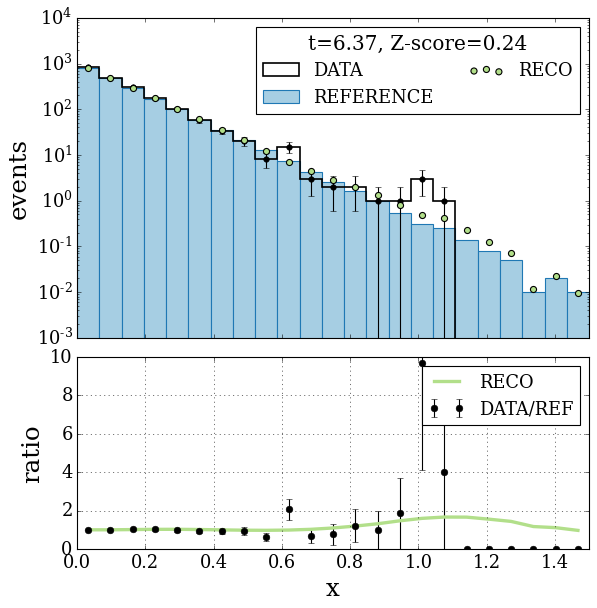

[--] Toy 1: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2009, 1)
t = 17.28724102142659
Time = 3.91 sec
Z = 2.3441440533176485
	


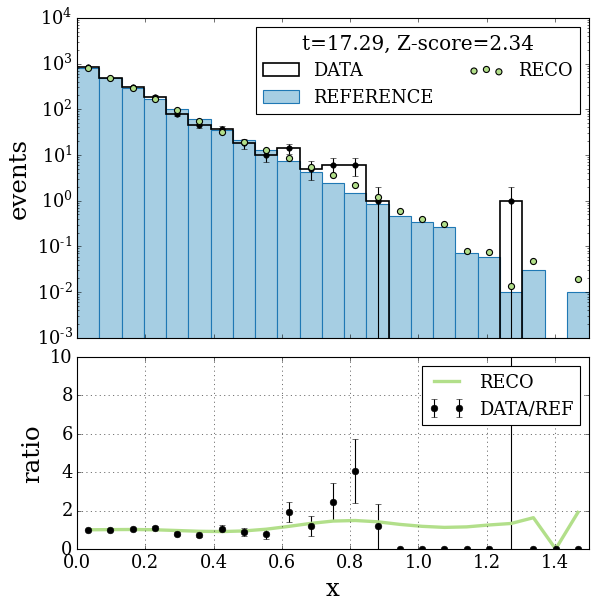

[--] Toy 2: 
[--] Reference shape:(200000, 1)
[--] Data shape:(1981, 1)
t = 22.166645278444243
Time = 2.89 sec
Z = 3.0044178644544073
	


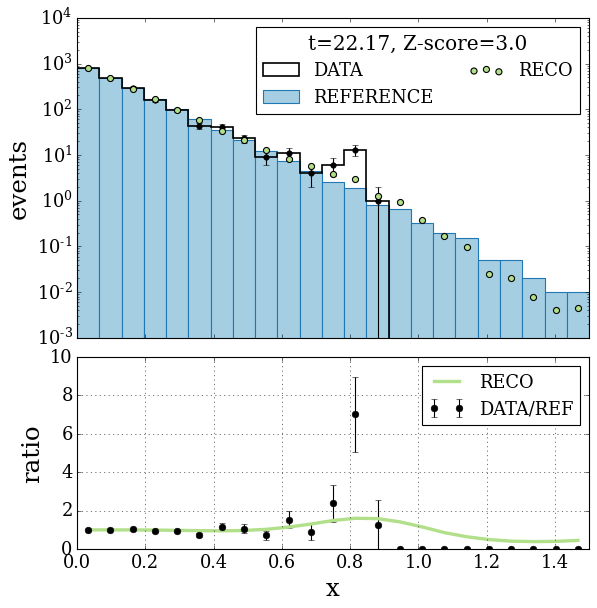

[--] Toy 3: 
[--] Reference shape:(200000, 1)
[--] Data shape:(1939, 1)
t = 33.6651196007213
Time = 2.91 sec
Z = 4.27461511563797
	


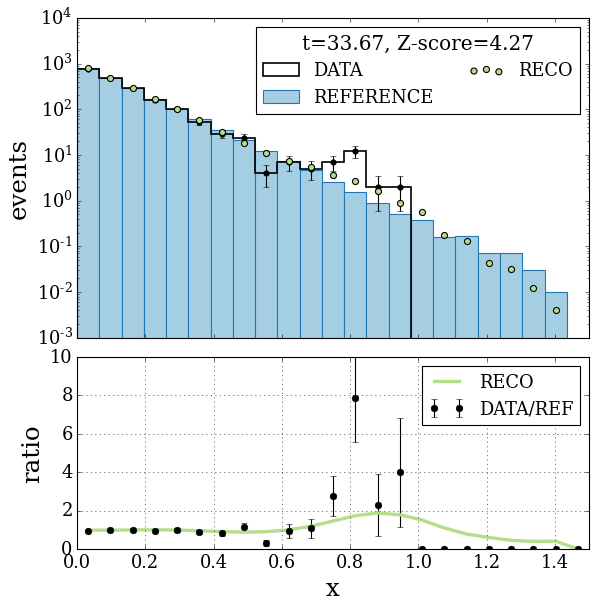

[--] Toy 4: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2115, 1)


/home/marcol/FLK_NPLM_1D/FalkonNPLM_1D/notebook/utils.py:332: RuntimeWarning: invalid value encountered in log
  loglk = np.log((preds+1)/(1-preds))


t = nan
Time = 2.87 sec
Z = nan
	


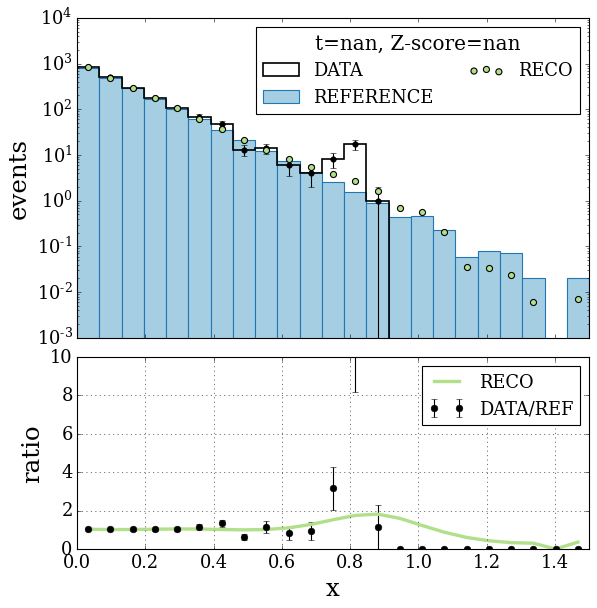

[--] Toy 5: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2053, 1)
t = 13.171845899196867
Time = 2.88 sec
Z = 1.6913574181058737
	


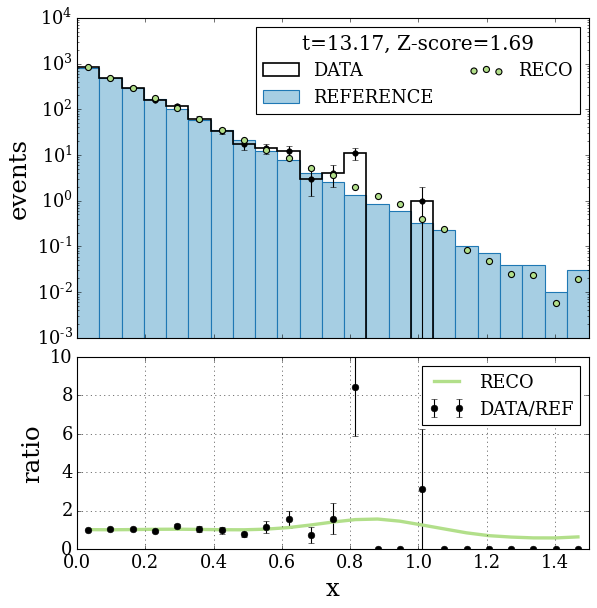

[--] Toy 6: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2014, 1)
t = 7.061496051114556
Time = 2.86 sec
Z = 0.41978283257269144
	


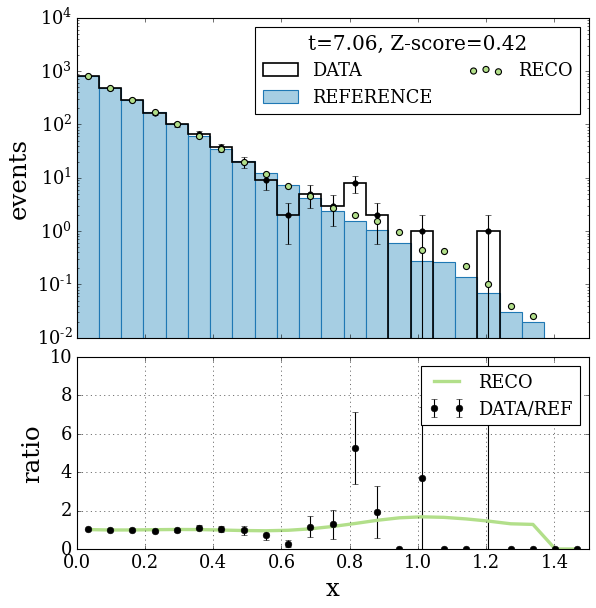

[--] Toy 7: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2029, 1)
t = 27.54417728774007
Time = 2.85 sec
Z = 3.63747779825416
	


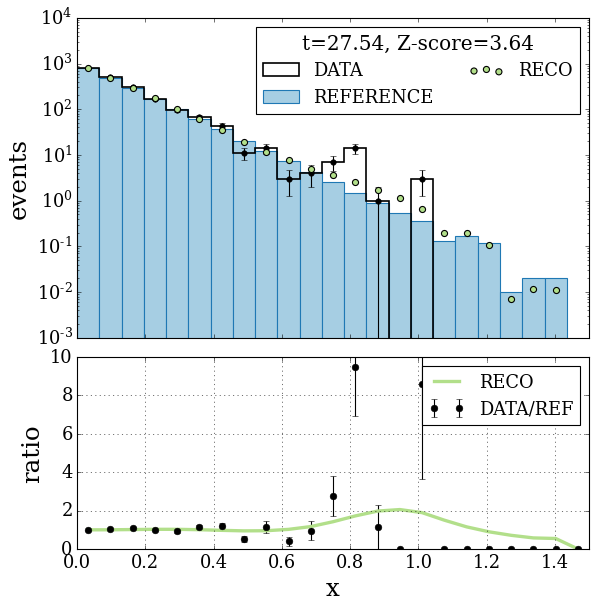

[--] Toy 8: 
[--] Reference shape:(200000, 1)
[--] Data shape:(1990, 1)
t = 21.28600056097671
Time = 2.98 sec
Z = 2.8922758292118704
	


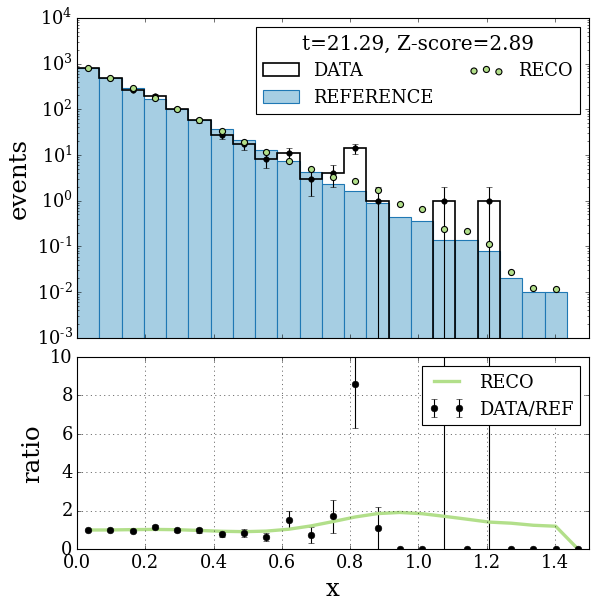

[--] Toy 9: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2069, 1)
t = 39.10104239303615
Time = 2.87 sec
Z = 4.785910894817353
	


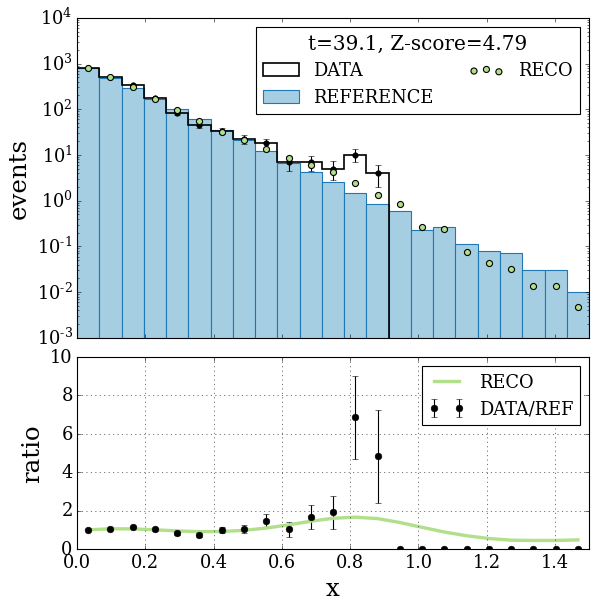

[--] Toy 10: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2122, 1)
t = 35.006784392925994
Time = 2.83 sec
Z = 4.40500830568353
	


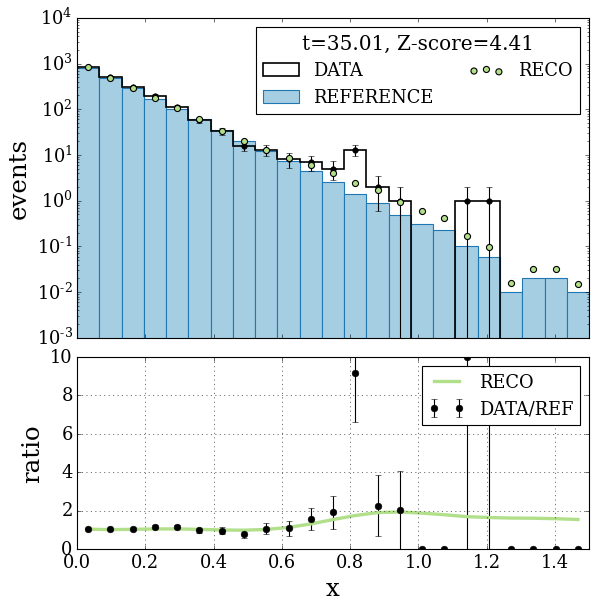

[--] Toy 11: 
[--] Reference shape:(200000, 1)
[--] Data shape:(1953, 1)
t = 20.38570312629497
Time = 2.92 sec
Z = 2.774706405333439
	


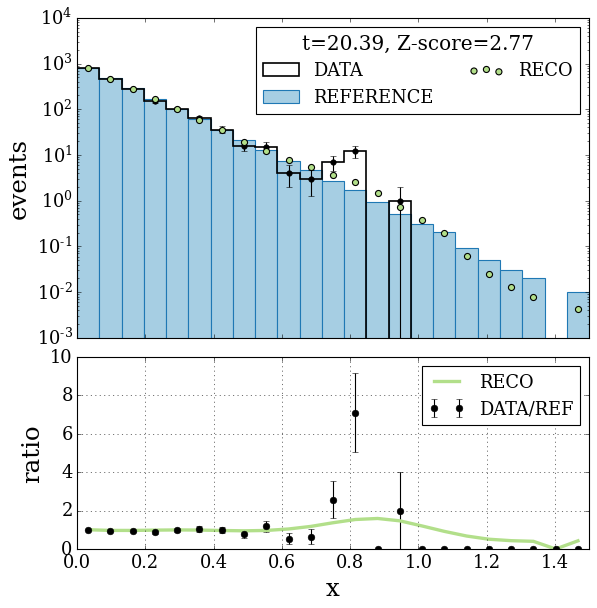

[--] Toy 12: 
[--] Reference shape:(200000, 1)
[--] Data shape:(1963, 1)
t = 12.420543496335505
Time = 2.16 sec
Z = 1.558947613280293
	


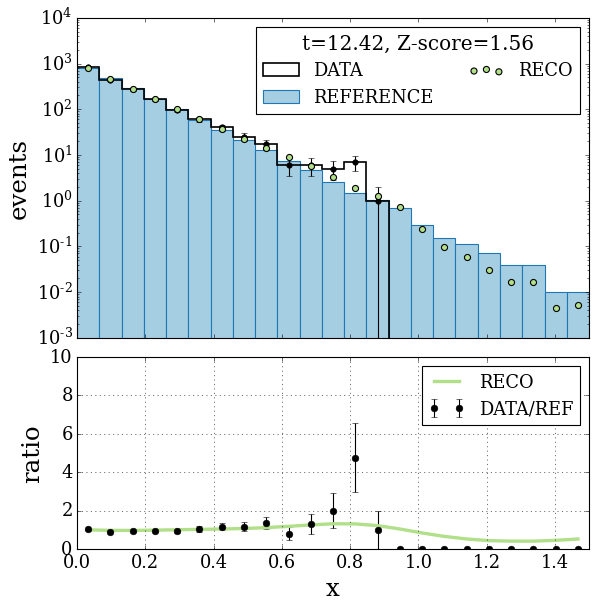

[--] Toy 13: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2070, 1)
t = 23.0906342079802
Time = 3.57 sec
Z = 3.1192425270557567
	


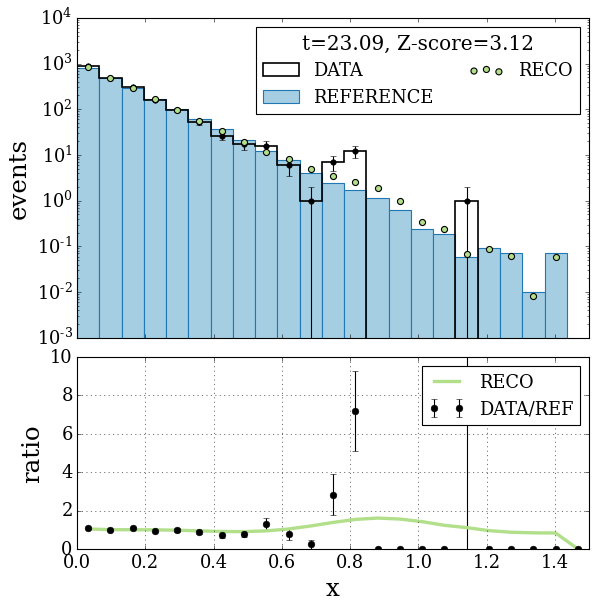

[--] Toy 14: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2060, 1)
t = 16.143704659335583
Time = 3.89 sec
Z = 2.1733791810699374
	


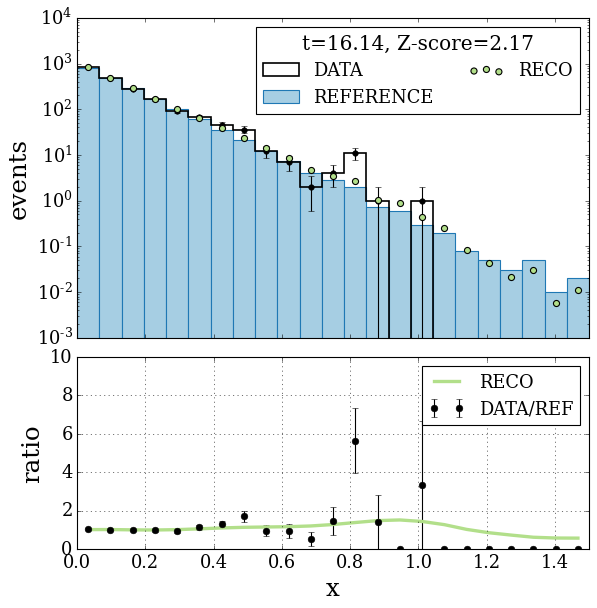

[--] Toy 15: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2033, 1)
t = 20.074138844615803
Time = 4.42 sec
Z = 2.733291154677372
	


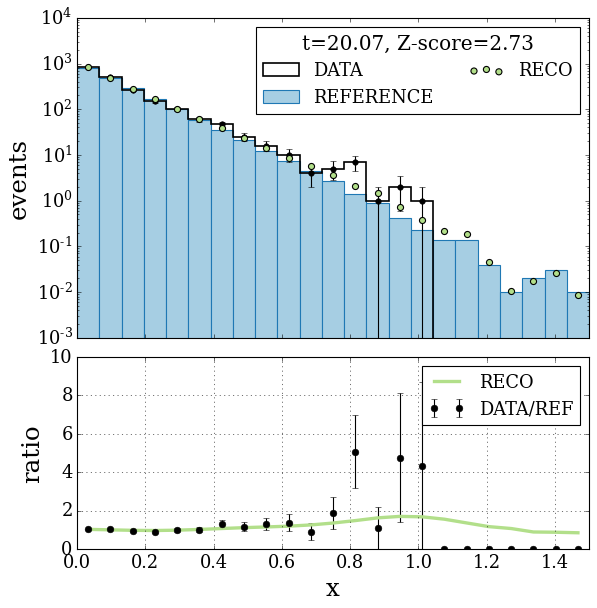

[--] Toy 16: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2013, 1)
t = 2.1361820853589784
Time = 3.81 sec
Z = -1.3948296366497515
	


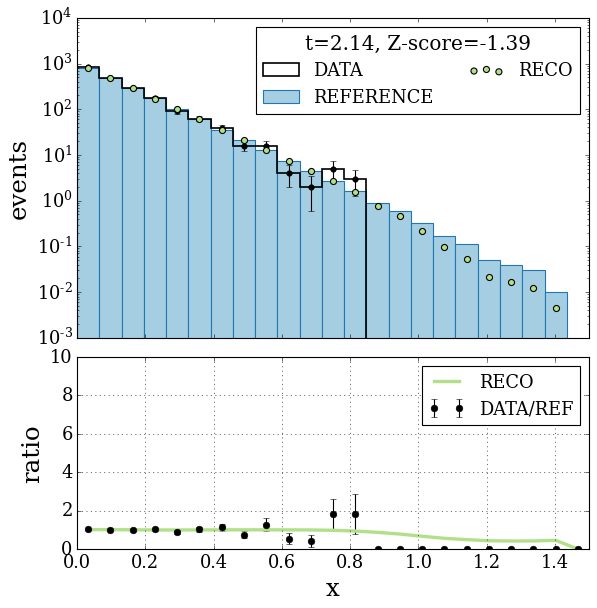

[--] Toy 17: 
[--] Reference shape:(200000, 1)
[--] Data shape:(2062, 1)
t = 17.06393030616242
Time = 4.7 sec
Z = 2.3113536720560726
	


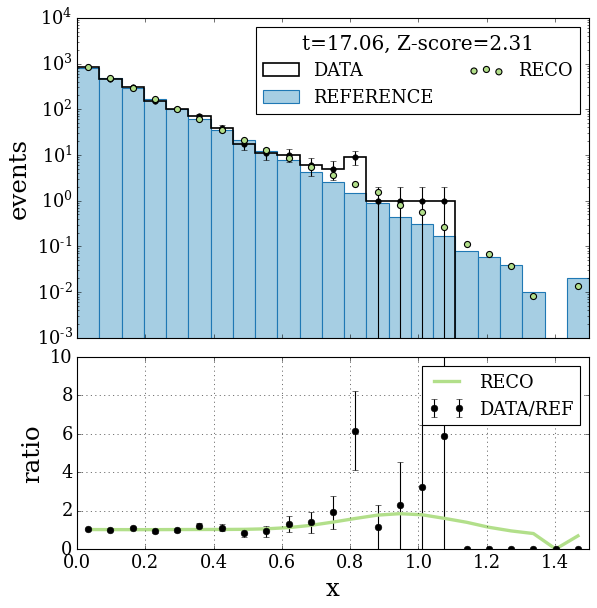

[--] Toy 18: 
[--] Reference shape:(200000, 1)
[--] Data shape:(1995, 1)


/home/marcol/FLK_NPLM_1D/FalkonNPLM_1D/notebook/utils.py:332: RuntimeWarning: invalid value encountered in log
  loglk = np.log((preds+1)/(1-preds))


t = nan
Time = 3.25 sec
Z = nan
	


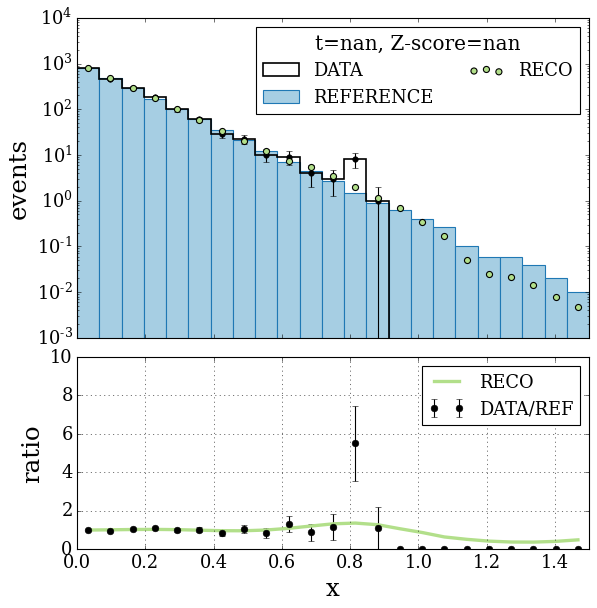

[--] Toy 19: 
[--] Reference shape:(200000, 1)
[--] Data shape:(1998, 1)
t = 7.720747237929455
Time = 5.12 sec
Z = 0.5851015931672066
	


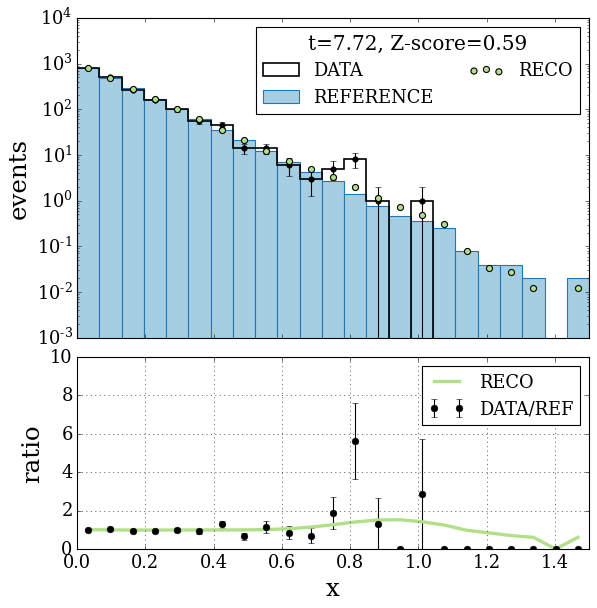

In [24]:
N_0=200000 # size of reference sample
N0=2000 # expected background
weight=N0/N_0

M = 2000
lam = 1e-6
flk_sigma = 0.3

flk_config = get_flk_config(M,flk_sigma,lam,weight=weight,seed=None,cpu=False) # seed is set inside learn_t function

# null hypothesis
#NS=0 # expected NP component
#run_toys_flk("NP0", "./reference/", N_0, N0, NS, flk_config, toys=np.arange(100), plots_freq=0, df=5.93)

# alternative hypothesis with NP1 signal
NS=10 # expected NP component
run_toys_flk("NP1", "./NP1/", N_0, N0, NS, flk_config, toys=np.arange(20), plots_freq=1, df=6.21)

In [ ]:
# to find the degree of freedom of the chi2 for the reference experiments, use the function return_best_chi2dof in utils.py

# in utils.py additional functions can be found to plot the test statistics

In [22]:
ref_t = np.genfromtxt("./runs/29Jun23_154001/reference/t.txt",delimiter=",")

In [23]:
np.nanmean(ref_t[:,1])

6.202975238273591

In [25]:
NP1_t = np.genfromtxt("./runs/29Jun23_154817/NP1/t.txt",delimiter=",")

In [27]:
norm.ppf(chi2.cdf(np.nanmedian(NP1_t), 6.21))

1.6764581766935358